# Independence analysis with OpenFOAM
---

We used the open-source CFD package `OpenFOAM` and its laminar solver for incompressible flow, `icoFOAM` to replicate the lift-enhancement of a two-dimensional flying-snake cross-section at Reynolds number 2000 and angle-of-attack 35 degrees reported in Kirshnan et al. (2014).

In this notebook, we report the results of our iterative and grid independence in the time-averaged lift coefficient, quantity of interest in our study.

All results reported here were obtained using OpenFOAM-2.3.

---
_Warnings:_

1. Some cells in this notebook requires the numerical solution of the flying-snake simulations.
If you do not have the solution, skip the cell and execute the following one to see the results.

2. Python post-processing scripts to plot the figures make use of the package `snake`, available on [GitHub](https://github.com/mesnardo/snake).
---

In [1]:
import os
import sys
%matplotlib inline

from IPython.display import Image

import snake

In [ ]:
print('Python version: {}'.format(sys.version))
print('snake version: {}'.format(snake.__version__))

Last time we ran this notebook, the output of the cell above was:
```
Python version: 2.7.12 |Anaconda 2.5.0 (64-bit)| (default, Jul  2 2016, 17:42:40) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
snake version: 0.1.2
```

---
## Table of contents of the directory:
---

* `iterativeIndependence/`:
    - `tol1.0E-06`: we use of tolerance of $10^{-6}$ as exit criterion for both the velocity ans pressure iterative solvers. (This simulation is reported in our manuscript.)
    - `tol1.0E-08`: we tighten the exit criterion by reducing the tolerance by two order of magnitude for both solvers to assess iterative independence in the force coefficients.

* `gridIndependence/`
    - `h0.004`: the mesh is refined around the bluff-body and in its near wake with a characteristic cell-width of $0.004c$ (where $c$ is the body chord-length).
    - `h0.002`: we further refined the spatial discretization in the vicinity of the bluff-body with a characteristic cell-width of $0.002c$ to assess grid-indenpendence in the quantity of interest: the time-averaged lift coefficient.

---
## Iterative independence
---

The numerical computation reported in our manuscript uses exit criterion for the iterative solvers (velocity and pressure) based on a tolerance of $10^{-6}$.

We investigated the effect of the tolerance on the instantaneous forces: we decreased the tolerance by two orders of magnitude while keeping other parameters identical.

The next cell executes a Python script named `plotForceCoefficientsCompareTol.py`, located in the folder `iterativeIndependence`, that requires the numerical solution of the simulations located in `tol1.0E-06` and `tol1.0E-08`.
In these subfolders, we provide all input files necessary to re-run the simulations.
In addition, each subfolder contains a Jupyter-Notebook with details about the simulation.
If you do not have the numerical solutions, you may skip the next cell and execute the one after to display the instantaneous force coefficients.

In [ ]:
# WARNING: execute this cell if you have the numerical solutions
script = os.path.join('iterativeIndependence',
                      'plotForceCoefficientsCompareTol.py')
%run $script

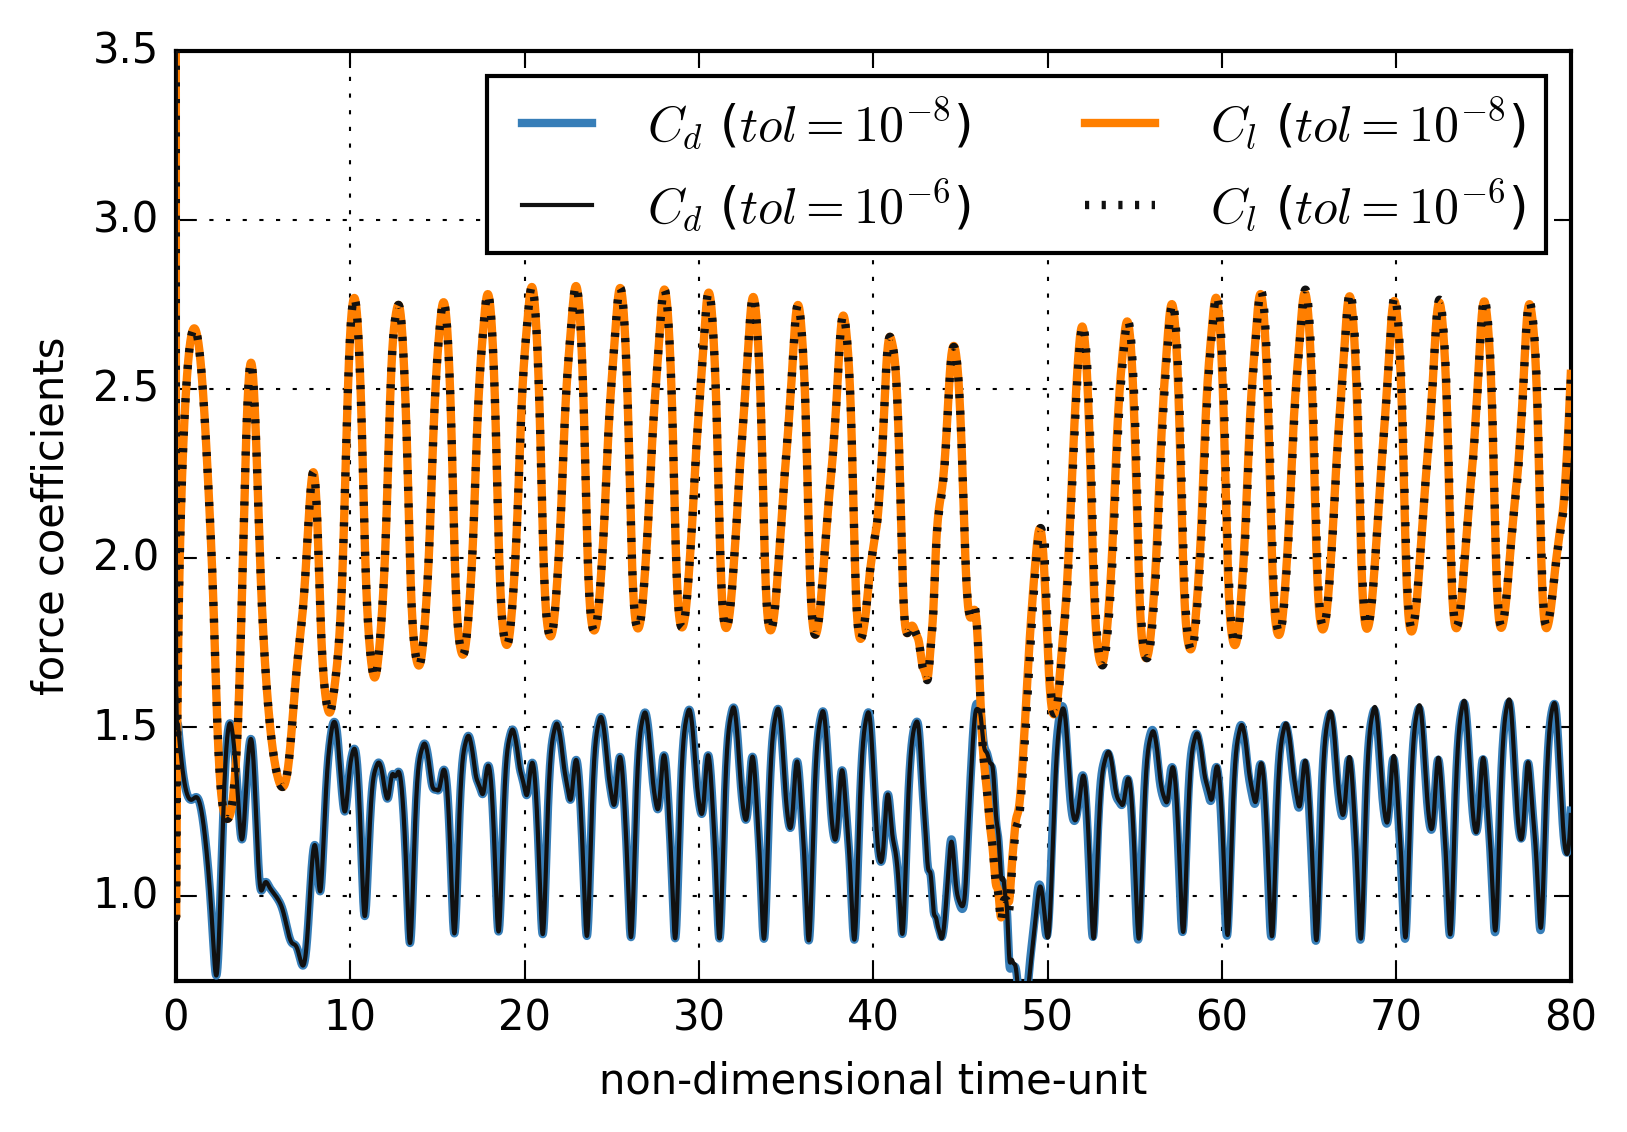

In [2]:
Image(os.path.join('iterativeIndependence',
                   'forceCoefficientsCompareTol.png'))

When we average the force coefficients between 32 and 64 time-units, we get:

| tol | Avg. $C_d$ | $\Delta C_d / C_d$ | Avg. $C_l$ | $\Delta C_l / C_l$ |
|:-:|:-:|:-:|:-:|:-:|
| $10^{-6}$ | $1.2306$ |  | $2.0803$ |  |
| $10^{-8}$ | $1.2315$ | $+0.07\%$ | $2.0814$ | $+0.05\%$ |

Using more demanding exit criterion for the two iterative solvers did not affect the forces acting on the bluff-body.
Thus, we consider to have reach iterative independence for the simulation at Reynolds number 2000 and angle-of-attack 35 degrees.

---
## Grid independence
---

In our manuscript, we report the numerical solution obtained on a two-dimensional mesh generated with snappyHexMesh (one of the mesh utilities of OpenFOAM).
The base uniform mesh contains 120x120 cells in a $30c \times 30c$ domain (the snake cross-section is centered in it and $c$ denotes the chord-length of the body) and we refined it in the wake region ($[-2,15]\times[-4,4]$) with a characteristic cell-width of $0.16c$. A further refinement (with characteristic cell-width of $0.004c$) was added in the near-wake region ($[-1, 10]\times[-2,2]$).
We generated a mesh that contains about $3.4$ million cells.

To assess grid-independence in the time-averaged force coefficients, we computed the solution on a mesh with extra refinement in the vicinity of the bluff-body (characteristic cell-width of $0.002c$ in the region $[-1,4]\times[-1,1]$). 
The finer mesh contains about $5.3$ millions cells.

The next cell executes a Python script named `plotForceCoefficientsCompareMeshes.py` that requires the numerical solution of the simulations located in `h0.004` and `h0.008`.
In these subfolders, we provide all input files necessary to re-run the simulations.
In addition, each subfolder contains a Jupyter-Notebook with details about the simulation.
If you do not have the numerical solutions, you may skip the next cell and execute the one after to display the instantaneous force coefficients.

In [ ]:
# WARNING: execute this cell if you have the numerical solutions
script = os.path.join('gridIndependence',
                      'plotForceCoefficientsCompareMeshes.py')
%run $script

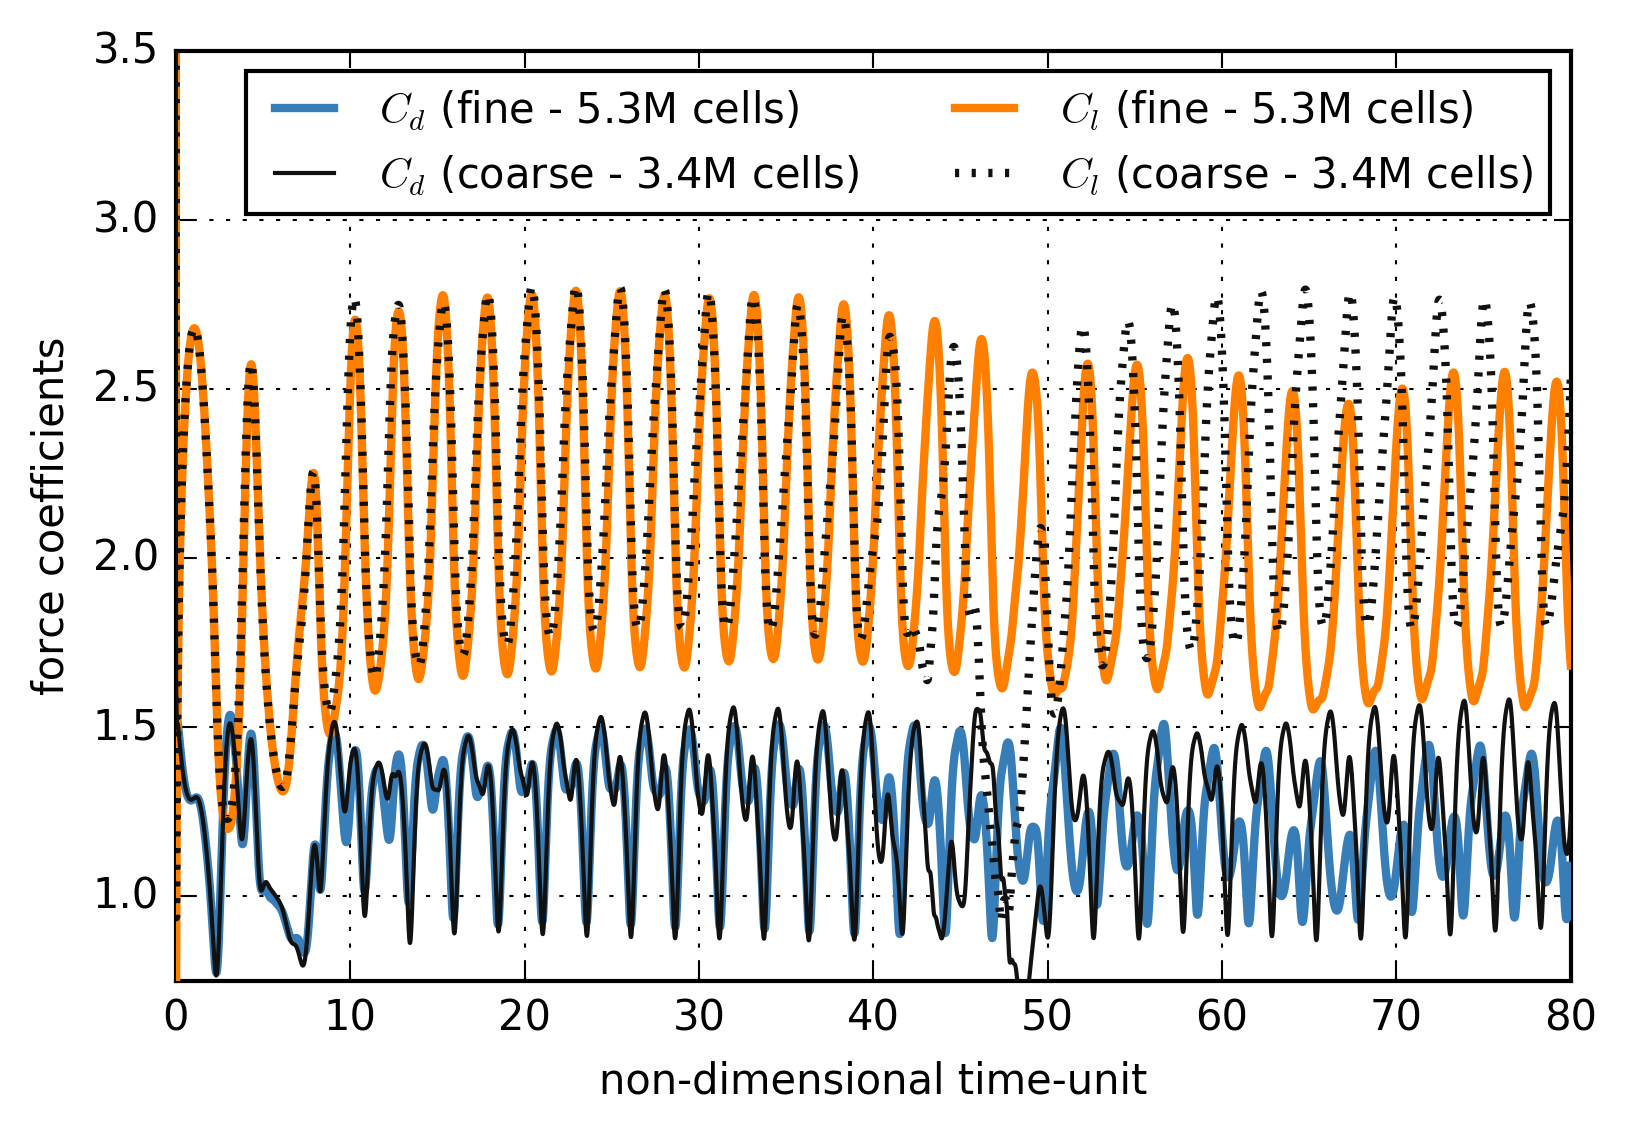

In [3]:
Image(os.path.join('gridIndependence',
                   'forceCoefficientsCompareMeshes.png'))

When we average the force coefficients between 32 and 64 time-units, we get:

| mesh | Avg. $C_d$ | $\Delta C_d / C_d$ | Avg. $C_l$ | $\Delta C_l / C_l$ |
|:-:|:-:|:-:|:-:|:-:|
| coarse (3.4M cells) | $1.2306$ |  | $2.0803$ |  |
| fine (5.3M cells) | $1.2359$ | $+0.43\%$ | $2.0868$ | $+0.31\%$ |

Although the instantaneous force coefficients exhibit important differences over the course of the simulation, the time-averaged values are close to each other.
With the coarse mesh (the one reported in our manuscript), the high mean lift value between 50 and 64 time-units compensates the brutal drop in the lift that occurs just before 50 time-units.

As stated, the quantity of interest in this study is the time-averaged lift coefficient between 32 and 64 time-units (arbitrary range chosen by Krishnan and co-workers).
Thus, we consider to have achieved grid-independence for this quantity.

---
#### References:

* Krishnan, A., Socha, J. J., Vlachos, P. P., & Barba, L. A. (2014). Lift and wakes of flying snakes. Physics of Fluids (1994-present), 26(3), 031901.

---